In [7]:
""" 1.取得資料
"""
from sklearn.datasets import load_iris

iris = load_iris()

In [13]:
"""2.Preprocessing 資料前處理、切分成訓練資料與驗證資料
"""
from sklearn.model_selection import train_test_split

data = iris.data
target = iris.target
# 這次使用sepal_length , sepal_width進行訓練即可


x_train , x_test,y_train,y_test = train_test_split(data,target)

print("隨機挑選 ",len(x_train)," 筆資料進行訓練")
print("隨機挑選 ",len(x_test)," 筆資料做最後驗證")
print("shape of test data : ",x_test.shape)
"""3.Training 使用NN進行訓練
"""
from sklearn.neural_network import MLPClassifier


nn = MLPClassifier(solver='adam', alpha=1e-4,activation='tanh',
                    hidden_layer_sizes=(3,10, 5), random_state=1)

# 訓練
iris_clf = nn.fit(x_train, y_train)

print(iris_clf.__class__)
"""4.Validation 驗證模型
用測試資料評估數學模型的好壞，最簡單的方式就是比較預測資料與原始資料的結果是否相符，依照預測正確的數量來計算正確率(Accuracy)。
"""
# do the validation
y_predict = iris_clf.predict(x_test)
print("原始結果 original result:")
print(y_test)
print("預測結果 predicted result:")
print(y_predict)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy(正確率) ={:8.3f}%".format(accuracy*100))

隨機挑選  112  筆資料進行訓練
隨機挑選  38  筆資料做最後驗證
shape of test data :  (38, 4)
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
原始結果 original result:
[2 1 0 2 0 0 2 1 0 1 2 2 2 2 1 0 2 1 0 1 0 1 1 1 1 2 2 1 2 1 1 1 2 0 2 0 1
 2]
預測結果 predicted result:
[2 1 0 2 0 0 2 1 0 1 2 2 2 2 1 0 2 1 0 1 0 1 2 2 1 2 2 1 2 1 1 1 2 0 2 0 1
 2]
Accuracy(正確率) =  94.737%
/home/wason/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


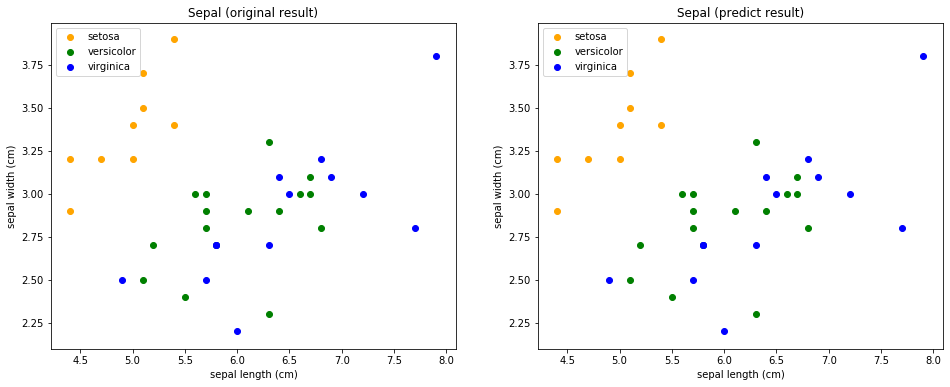

In [22]:
"""5.1 Plotting 作圖
比照原始結果與預測結果的不同，預測錯誤的點使用紅色標出
"""
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt1 = plt.subplot(1,2,1)

# 驗證資料 與 原始結果
sepal_length = x_test[:,0]
sepal_width = x_test[:,1]
plt1.scatter(sepal_length[y_test==0],sepal_width[y_test==0],c='orange')
plt1.scatter(sepal_length[y_test==1],sepal_width[y_test==1],c='green')
plt1.scatter(sepal_length[y_test==2],sepal_width[y_test==2],c='blue')
# 加上圖示
plt1.legend(iris.target_names)
# 加上標題
plt1.set_title('Sepal (original result)')
plt1.set_xlabel(iris.feature_names[0])
plt1.set_ylabel(iris.feature_names[1])

# 驗證資料 與 預測結果
plt2 = plt.subplot(1,2,2)
plt2.scatter(sepal_length[y_predict==0],sepal_width[y_predict==0],c='orange')
plt2.scatter(sepal_length[y_predict==1],sepal_width[y_predict==1],c='green')
plt2.scatter(sepal_length[y_predict==2],sepal_width[y_predict==2],c='blue')
plt2.scatter(sepal_length[y_predict!=y_test],sepal_width[y_predict!=y_test],c='red',marker='v')
# 加上圖示
plt2.legend(iris.target_names)
# 加上標題
plt2.set_title('Sepal (predict result)')
plt2.set_xlabel(iris.feature_names[0])
plt2.set_ylabel(iris.feature_names[1])
plt.show()

In [21]:
"""練習Lab02-4:使用NN來預測酒的種類，看看準確度會如何?試試看調整不同參數。
複習重點1.了解不同feature對數學模型的影響
複習重點2.了解資料科學領域的步驟
複習重點3.嘗試了解不同分類器不同參數的用途。
"""
from sklearn.datasets import load_wine

wine = load_wine()
data = wine.data
target = wine.target
print(wine.target_names)
print(wine.feature_names)



['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [22]:
x_train , x_test,y_train,y_test = train_test_split(data,target)

print("隨機挑選 ",len(x_train)," 筆資料進行訓練")
print("隨機挑選 ",len(x_test)," 筆資料做最後驗證")
print("shape of test data : ",x_test.shape)
"""3.Training 使用NN進行訓練
"""
from sklearn.neural_network import MLPClassifier


nn = MLPClassifier(solver='adam', alpha=1e-4,activation='tanh',
                    hidden_layer_sizes=(3,10, 5), random_state=1)

# 訓練
iris_clf = nn.fit(x_train, y_train)

print(iris_clf.__class__)
y_predict = iris_clf.predict(x_test)
print("原始結果 original result:")
print(y_test)
print("預測結果 predicted result:")
print(y_predict)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy(正確率) ={:8.3f}%".format(accuracy*100))

隨機挑選  133  筆資料進行訓練
隨機挑選  45  筆資料做最後驗證
shape of test data :  (45, 13)
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
原始結果 original result:
[0 1 1 0 1 1 0 0 1 2 1 2 1 2 0 1 1 1 2 1 0 1 2 1 2 2 2 2 1 1 0 1 2 2 1 2 0
 0 1 1 0 2 1 0 0]
預測結果 predicted result:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
Accuracy(正確率) =  44.444%


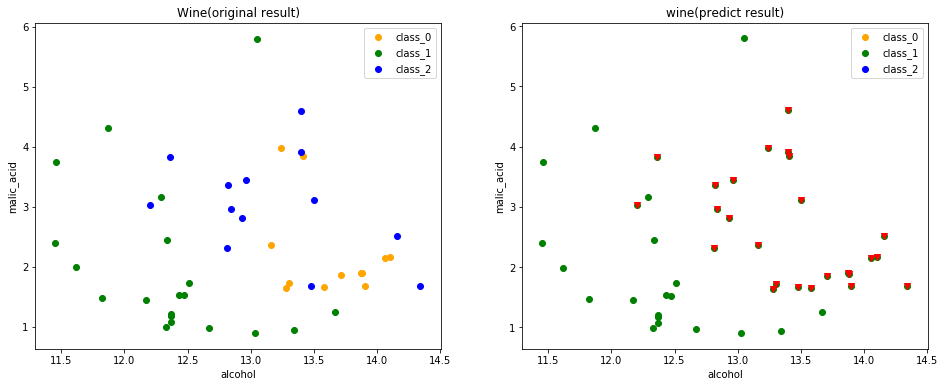

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt1 = plt.subplot(1,2,1)

# 驗證資料 與 原始結果
sepal_length = x_test[:,0]
sepal_width = x_test[:,1]
plt1.scatter(sepal_length[y_test==0],sepal_width[y_test==0],c='orange')
plt1.scatter(sepal_length[y_test==1],sepal_width[y_test==1],c='green')
plt1.scatter(sepal_length[y_test==2],sepal_width[y_test==2],c='blue')
# 加上圖示
plt1.legend(wine.target_names)
# 加上標題
plt1.set_title('Wine(original result)')
plt1.set_xlabel(wine.feature_names[0])
plt1.set_ylabel(wine.feature_names[1])

# 驗證資料 與 預測結果
plt2 = plt.subplot(1,2,2)
plt2.scatter(sepal_length[y_predict==0],sepal_width[y_predict==0],c='orange')
plt2.scatter(sepal_length[y_predict==1],sepal_width[y_predict==1],c='green')
plt2.scatter(sepal_length[y_predict==2],sepal_width[y_predict==2],c='blue')
plt2.scatter(sepal_length[y_predict!=y_test],sepal_width[y_predict!=y_test],c='red',marker='v')
# 加上圖示
plt2.legend(wine.target_names)
# 加上標題
plt2.set_title('wine(predict result)')
plt2.set_xlabel(wine.feature_names[0])
plt2.set_ylabel(wine.feature_names[1])
plt.show()